In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from pandas import DataFrame, Series

In [4]:
import pymongo

In [5]:
client = pymongo.MongoClient('localhost', 27017)
db = client['DoubanMoive']
collection  = db.get_collection('Moives')

In [6]:
all_result = list(collection.find({}))

In [7]:
len(all_result)

48997

In [8]:
columns= ['Name', 'Country', 'Genre', 'Director', 'Time', 'Voters', 'Star', 'StarDistribution']

In [9]:
movies = DataFrame(all_result, columns=columns)

In [10]:
movies[:2]

,Name,Country,Genre,Director,Time,Voters,Star,StarDistribution
0,机械师2：复活 Mechanic: Resurrection,"[法国, 美国]",动作犯罪,丹尼斯·甘塞尔,(2016),19272,5.7,5.8%14.3%47.0%26.4%6.5%
1,侠探杰克：永不回头 Jack Reacher: Never Go Back,[美国],剧情动作悬疑惊悚犯罪,爱德华·兹威克,(2016),5269,6.2,4.3%20.4%57.2%15.3%2.8%


In [11]:
movies.count()

Name                48997
Country             48997
Genre               48997
Director            48997
Time                48997
Voters              47194
Star                47194
StarDistribution    47194
dtype: int64

In [14]:
movies1 = movies.drop_duplicates('Name') #movies1：去重后的数据

In [15]:
movies1.count()

Name                48133
Country             48133
Genre               48133
Director            48133
Time                48133
Voters              46348
Star                46348
StarDistribution    46348
dtype: int64

In [16]:
movies2 = movies1.fillna(0) #movies2：处理缺失数据后的数据

In [17]:
movies2.count()

Name                48133
Country             48133
Genre               48133
Director            48133
Time                48133
Voters              48133
Star                48133
StarDistribution    48133
dtype: int64

In [18]:
replace_columns = {'Voters':'VoterNumber'}

In [19]:
movies3 = movies2.rename(columns = replace_columns) #moives3：重新命名columns

In [20]:
movies3.columns

Index(['Name', 'Country', 'Genre', 'Director', 'Time', 'VoterNumber', 'Star',
       'StarDistribution'],
      dtype='object')

In [21]:
def get_int(obj):
    return int(obj)

In [22]:
def get_float(obj):
    return float(obj)

In [23]:
movies3.ix[0]['VoterNumber']

'19272'

In [24]:
movies3.VoterNumber = movies3.VoterNumber.map(get_int) #将VoterNumber类型转化为int型，原来为string

In [25]:
movies3.ix[0]['VoterNumber']

19272

In [26]:
movies3.ix[0]['Star']

'5.7'

In [27]:
movies3.Star = movies3.Star.map(get_float) #将Star类型转化为float型，原来为string

In [28]:
movies3.ix[0]['Star']

5.7000000000000002

In [29]:
movies3[:10]

,Name,Country,Genre,Director,Time,VoterNumber,Star,StarDistribution
0,机械师2：复活 Mechanic: Resurrection,"[法国, 美国]",动作犯罪,丹尼斯·甘塞尔,(2016),19272,5.7,5.8%14.3%47.0%26.4%6.5%
1,侠探杰克：永不回头 Jack Reacher: Never Go Back,[美国],剧情动作悬疑惊悚犯罪,爱德华·兹威克,(2016),5269,6.2,4.3%20.4%57.2%15.3%2.8%
2,湄公河行动,"[中国大陆, 香港]",动作犯罪,林超贤,(2016),190658,8.2,33.2%46.0%18.1%2.1%0.6%
3,惊天破,"[中国大陆, 香港]",剧情动作悬疑犯罪,吴品儒,(2016),4544,3.9,0.8%4.3%21.5%33.4%40.0%
4,圆梦巨人 The BFG,"[美国, 英国]",奇幻冒险,史蒂文·斯皮尔伯格,(2016),16015,6.8,11.8%30.9%45.0%10.5%1.7%
5,龙珠Z：复活的弗利萨 ドラゴンボールZ 復活のF,[日本],动画,山室直儀,(2015),5449,5.8,5.0%15.3%50.1%23.2%6.4%
6,从你的全世界路过,[中国大陆],喜剧爱情,张一白,(2016),84648,5.5,7.1%16.7%37.2%24.0%15.0%
7,凶手还未睡 兇手還未睡,[香港],剧情悬疑惊悚,邱礼涛,(2016),236,4.5,2.9%8.8%25.5%35.3%27.5%
8,遵义会议,[中国大陆],历史战争,刘星胡明刚于兰,(2016),149,2.4,2.1%0.0%0.0%12.5%85.4%
9,鲁滨逊漂流记 Robinson Crusoe,"[比利时, 法国]",喜剧动画冒险,文森特·凯斯特鲁特本·斯塔森,(2016),1746,5.6,5.8%12.5%46.4%24.6%10.5%


In [30]:
movies3.info()  #查看数据类型

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48133 entries, 0 to 48996
Data columns (total 8 columns):
Name                48133 non-null object
Country             48133 non-null object
Genre               48133 non-null object
Director            48133 non-null object
Time                48133 non-null object
VoterNumber         48133 non-null int64
Star                48133 non-null float64
StarDistribution    48133 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 3.3+ MB


In [33]:
movies4 = movies3[ movies3['VoterNumber'] > 1000 ]

In [34]:
movies4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15150 entries, 0 to 48994
Data columns (total 8 columns):
Name                15150 non-null object
Country             15150 non-null object
Genre               15150 non-null object
Director            15150 non-null object
Time                15150 non-null object
VoterNumber         15150 non-null int64
Star                15150 non-null float64
StarDistribution    15150 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 1.0+ MB


In [35]:
#movies4将用于制作图像，将评分人数>1000的作品进行绘图

In [37]:
movies_data = (movies4.sort_index(by=['Star','VoterNumber'],ascending=[False,False]))  

E:\anaconda\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  if __name__ == '__main__':


In [38]:
movies_data[:5]

,Name,Country,Genre,Director,Time,VoterNumber,Star,StarDistribution
7361,老友记 第十季 Friends Season 10,[美国],喜剧爱情,Kevin Bright,(2003),37085,9.8,90.4%8.2%1.2%0.1%0.1%
37616,人类星球 Human Planet,[英国],纪录片,Tom Hugh-JonesTuppence StoneNicolas BrownMark ...,(2011),8397,9.8,89.5%9.3%1.0%0.1%0.2%
14809,是，大臣 第二季 Yes Minister Season 2,[英国],喜剧,Peter WhitmoreSydney Lotterby,(1981),5031,9.8,91.1%8.0%0.8%0.0%0.0%
31714,是，大臣 第三季 Yes Minister Season 3,[英国],喜剧,Sydney LotterbyPeter Whitmore,(1982),4865,9.8,91.5%7.2%1.0%0.1%0.2%
24148,"是，首相 第二季 Yes, Prime Minister Season 2",[英国],喜剧,Peter WhitmoreSydney Lotterby,(1987),4192,9.8,90.7%8.3%0.8%0.0%0.2%


In [39]:
_ =  movies_data.set_index('Name',inplace=True)

In [40]:
movies_data[:5]

,Country,Genre,Director,Time,VoterNumber,Star,StarDistribution
Name,,,,,,,
老友记 第十季 Friends Season 10,[美国],喜剧爱情,Kevin Bright,(2003),37085,9.8,90.4%8.2%1.2%0.1%0.1%
人类星球 Human Planet,[英国],纪录片,Tom Hugh-JonesTuppence StoneNicolas BrownMark ...,(2011),8397,9.8,89.5%9.3%1.0%0.1%0.2%
是，大臣 第二季 Yes Minister Season 2,[英国],喜剧,Peter WhitmoreSydney Lotterby,(1981),5031,9.8,91.1%8.0%0.8%0.0%0.0%
是，大臣 第三季 Yes Minister Season 3,[英国],喜剧,Sydney LotterbyPeter Whitmore,(1982),4865,9.8,91.5%7.2%1.0%0.1%0.2%
"是，首相 第二季 Yes, Prime Minister Season 2",[英国],喜剧,Peter WhitmoreSydney Lotterby,(1987),4192,9.8,90.7%8.3%0.8%0.0%0.2%


In [41]:
dummies = DataFrame(np.zeros((len(movies_data), 5)), index = movies_data.index, columns = ['FiveStar', 'FourStar', 'ThreeStar', 'TwoStar', 'OneStar'])

In [42]:
dummies[:5]

,FiveStar,FourStar,ThreeStar,TwoStar,OneStar
Name,,,,,
老友记 第十季 Friends Season 10,0.0,0.0,0.0,0.0,0.0
人类星球 Human Planet,0.0,0.0,0.0,0.0,0.0
是，大臣 第二季 Yes Minister Season 2,0.0,0.0,0.0,0.0,0.0
是，大臣 第三季 Yes Minister Season 3,0.0,0.0,0.0,0.0,0.0
"是，首相 第二季 Yes, Prime Minister Season 2",0.0,0.0,0.0,0.0,0.0


In [43]:
movies_data.ix[1]['StarDistribution'].split('%')

['89.5', '9.3', '1.0', '0.1', '0.2', '']

In [44]:
 for i,stardis in enumerate(movies_data.StarDistribution):
    dummies.ix[i, ['FiveStar', 'FourStar', 'ThreeStar', 'TwoStar', 'OneStar']] = stardis.split('%')[:-1]

In [45]:
dummies[:5]

,FiveStar,FourStar,ThreeStar,TwoStar,OneStar
Name,,,,,
老友记 第十季 Friends Season 10,90.4,8.2,1.2,0.1,0.1
人类星球 Human Planet,89.5,9.3,1.0,0.1,0.2
是，大臣 第二季 Yes Minister Season 2,91.1,8.0,0.8,0.0,0.0
是，大臣 第三季 Yes Minister Season 3,91.5,7.2,1.0,0.1,0.2
"是，首相 第二季 Yes, Prime Minister Season 2",90.7,8.3,0.8,0.0,0.2


In [46]:
#dummies用来表示一个作品的5星，4星，3星，2星，1星的分布

In [47]:
dummies.ix[0].FiveStar

'90.4'

In [48]:
dummies.FiveStar = dummies.FiveStar.map(get_float)
dummies.FourStar = dummies.FourStar.map(get_float)
dummies.ThreeStar = dummies.ThreeStar.map(get_float)
dummies.TwoStar = dummies.TwoStar.map(get_float)
dummies.OneStar = dummies.OneStar.map(get_float)

In [49]:
dummies.ix[0].OneStar

0.10000000000000001

In [50]:
dummies[:2]

,FiveStar,FourStar,ThreeStar,TwoStar,OneStar
Name,,,,,
老友记 第十季 Friends Season 10,90.4,8.2,1.2,0.1,0.1
人类星球 Human Planet,89.5,9.3,1.0,0.1,0.2


In [51]:
movies_windic = movies_data.join(dummies.add_prefix('Ratio_Of_'))

In [52]:
movies_windic[:3]

,Country,Genre,Director,Time,VoterNumber,Star,StarDistribution,Ratio_Of_FiveStar,Ratio_Of_FourStar,Ratio_Of_ThreeStar,Ratio_Of_TwoStar,Ratio_Of_OneStar
Name,,,,,,,,,,,,
老友记 第十季 Friends Season 10,[美国],喜剧爱情,Kevin Bright,(2003),37085,9.8,90.4%8.2%1.2%0.1%0.1%,90.4,8.2,1.2,0.1,0.1
人类星球 Human Planet,[英国],纪录片,Tom Hugh-JonesTuppence StoneNicolas BrownMark ...,(2011),8397,9.8,89.5%9.3%1.0%0.1%0.2%,89.5,9.3,1.0,0.1,0.2
是，大臣 第二季 Yes Minister Season 2,[英国],喜剧,Peter WhitmoreSydney Lotterby,(1981),5031,9.8,91.1%8.0%0.8%0.0%0.0%,91.1,8.0,0.8,0.0,0.0


In [53]:
import matplotlib.pyplot as plt 

In [54]:
movies_windic['Star'].plot(kind='kde')

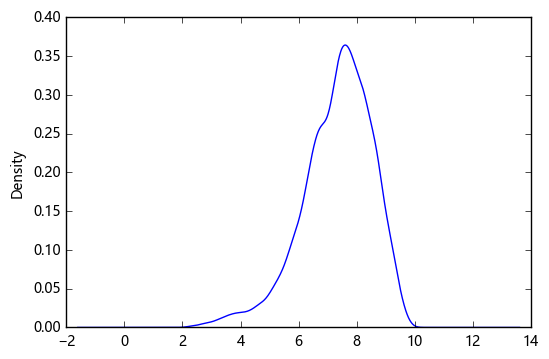

In [55]:
plt.show()

In [56]:
movies_windic['Star'].hist(bins=40)    

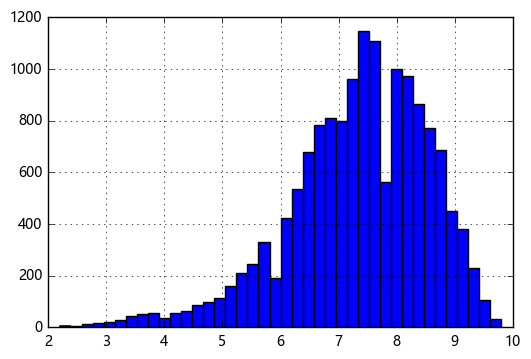

In [57]:
plt.show()

In [60]:
movies_windic['Star'].mean()

7.329801980197929

In [61]:
movies_windic['Star'].median()

7.5

In [62]:
#评论人数>1000的作品中，中位评分是7.5,平均评分7.3左右。按照图表显示多集中于7-8分左右

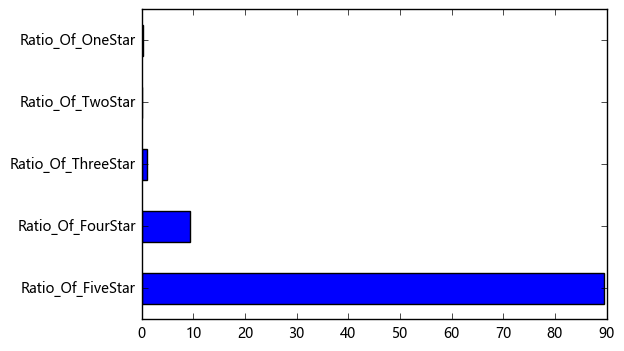

In [63]:
movies_windic.ix[1][['Ratio_Of_FiveStar','Ratio_Of_FourStar','Ratio_Of_ThreeStar','Ratio_Of_TwoStar','Ratio_Of_OneStar']].plot(kind='barh')
plt.show()

In [64]:
#典型优秀作品的星数分配，“一枝独秀”

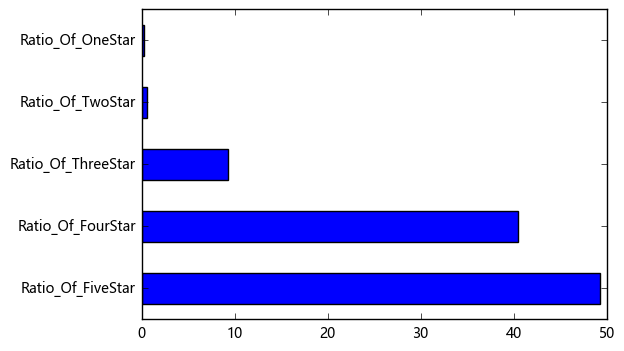

In [65]:
movies_windic.ix[1500][['Ratio_Of_FiveStar','Ratio_Of_FourStar','Ratio_Of_ThreeStar','Ratio_Of_TwoStar','Ratio_Of_OneStar']].plot(kind='barh')
plt.show()

In [66]:
#比较优秀作品的星数分配，4星和5星评分数量相近

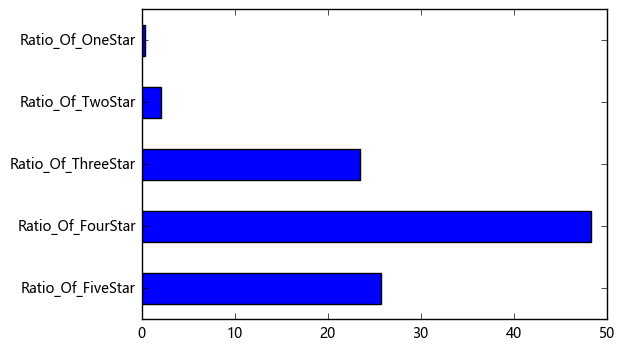

In [68]:
movies_windic.ix[5000][['Ratio_Of_FiveStar','Ratio_Of_FourStar','Ratio_Of_ThreeStar','Ratio_Of_TwoStar','Ratio_Of_OneStar']].plot(kind='barh')
plt.show()

In [69]:
#看起来还算爽的作品的分布，多为4星，5星和3星数量相当
#这类作品一般是看起来还挺惊心动魄的，可惜缺乏不朽的要素

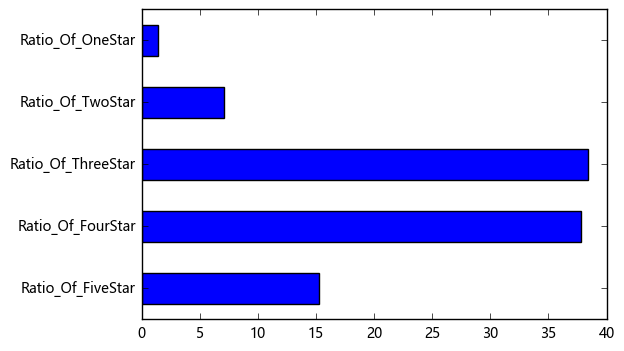

In [72]:
movies_windic.ix[9000][['Ratio_Of_FiveStar','Ratio_Of_FourStar','Ratio_Of_ThreeStar','Ratio_Of_TwoStar','Ratio_Of_OneStar']].plot(kind='barh')
plt.show()

In [75]:
#只能随便看看的作品

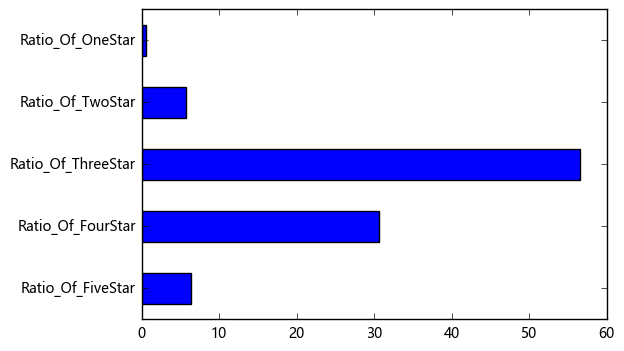

In [77]:
movies_windic.ix[11000][['Ratio_Of_FiveStar','Ratio_Of_FourStar','Ratio_Of_ThreeStar','Ratio_Of_TwoStar','Ratio_Of_OneStar']].plot(kind='barh')
plt.show()

In [79]:
#褒贬不一的作品，类似于大鱼海棠。属于有一定的闪光点，但是“瑜不掩瑕”


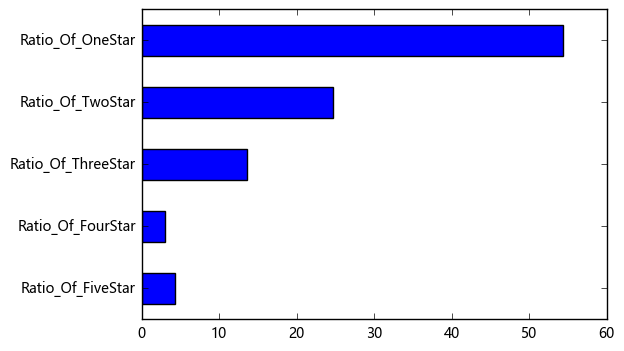

In [81]:
movies_windic.ix[15000][['Ratio_Of_FiveStar','Ratio_Of_FourStar','Ratio_Of_ThreeStar','Ratio_Of_TwoStar','Ratio_Of_OneStar']].plot(kind='barh')
plt.show()

In [82]:
#.....经典烂片

In [86]:
recommendation = movies_windic[ movies_windic['VoterNumber'] > 2500 ]

In [87]:
recommendation = movies_windic[ movies_windic['Star'] > 8.5 ]

In [88]:
recommendation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2259 entries, 老友记 第十季 Friends Season 10 to 偶剧 Screen Play
Data columns (total 12 columns):
Country               2259 non-null object
Genre                 2259 non-null object
Director              2259 non-null object
Time                  2259 non-null object
VoterNumber           2259 non-null int64
Star                  2259 non-null float64
StarDistribution      2259 non-null object
Ratio_Of_FiveStar     2259 non-null float64
Ratio_Of_FourStar     2259 non-null float64
Ratio_Of_ThreeStar    2259 non-null float64
Ratio_Of_TwoStar      2259 non-null float64
Ratio_Of_OneStar      2259 non-null float64
dtypes: float64(6), int64(1), object(5)
memory usage: 229.4+ KB


In [89]:
recommendation

,Country,Genre,Director,Time,VoterNumber,Star,StarDistribution,Ratio_Of_FiveStar,Ratio_Of_FourStar,Ratio_Of_ThreeStar,Ratio_Of_TwoStar,Ratio_Of_OneStar
Name,,,,,,,,,,,,
老友记 第十季 Friends Season 10,[美国],喜剧爱情,Kevin Bright,(2003),37085,9.8,90.4%8.2%1.2%0.1%0.1%,90.4,8.2,1.2,0.1,0.1
人类星球 Human Planet,[英国],纪录片,Tom Hugh-JonesTuppence StoneNicolas BrownMark ...,(2011),8397,9.8,89.5%9.3%1.0%0.1%0.2%,89.5,9.3,1.0,0.1,0.2
是，大臣 第二季 Yes Minister Season 2,[英国],喜剧,Peter WhitmoreSydney Lotterby,(1981),5031,9.8,91.1%8.0%0.8%0.0%0.0%,91.1,8.0,0.8,0.0,0.0
是，大臣 第三季 Yes Minister Season 3,[英国],喜剧,Sydney LotterbyPeter Whitmore,(1982),4865,9.8,91.5%7.2%1.0%0.1%0.2%,91.5,7.2,1.0,0.1,0.2
"是，首相 第二季 Yes, Prime Minister Season 2",[英国],喜剧,Peter WhitmoreSydney Lotterby,(1987),4192,9.8,90.7%8.3%0.8%0.0%0.2%,90.7,8.3,0.8,0.0,0.2
猎捕 The Hunt,[英国],纪录片,Rob Sullivan,(2015),4046,9.8,90.9%7.6%1.2%0.1%0.3%,90.9,7.6,1.2,0.1,0.3
老友记 第二季 Friends Season 2,[美国],喜剧爱情,迈克尔·莱拜克,(1995),40212,9.7,86.4%12.1%1.4%0.0%0.0%,86.4,12.1,1.4,0.0,0.0
老友记 第三季 Friends Season 3,[美国],喜剧爱情,Gail Mancuso,(1996),35981,9.7,86.5%12.0%1.4%0.1%0.0%,86.5,12.0,1.4,0.1,0.0
老友记 第四季 Friends Season 4,[美国],喜剧爱情,Shelley Jensen,(1997),34130,9.7,87.2%11.4%1.3%0.1%0.0%,87.2,11.4,1.3,0.1,0.0


In [90]:
#推荐作品